In [1]:
from tsp import TSP

In [2]:
import numpy as np
data = np.genfromtxt("../data/TSPA.csv", delimiter=";")

In [3]:
points = data[:, :2]
weights = data[:, 2]

In [4]:
diffs = points[:, np.newaxis, :] - points[np.newaxis, :, :]

In [5]:
D_clean = (np.floor(np.sqrt(np.sum(diffs**2, axis=-1)) +0.5))
D = (np.floor(np.sqrt(np.sum(diffs**2, axis=-1)) +0.5) + weights)

In [6]:
def pairwise_circular(lst):
    for i in range(len(lst) - 1):
        yield lst[i], lst[i + 1]
    yield lst[-1], lst[0]

In [7]:
D

array([[ 496., 2245., 2466., ..., 2534., 1862., 2407.],
       [2327.,  414.,  749., ..., 3299., 3152., 3907.],
       [2462.,  663.,  500., ..., 3517., 3344., 4103.],
       ...,
       [1393., 2076., 2380., ..., 1637., 1659., 2294.],
       [1103., 2311., 2589., ..., 2041., 1255., 2015.],
       [1596., 3014., 3296., ..., 2624., 1963., 1307.]])

In [8]:
D_clean

array([[   0., 1831., 1966., ...,  897.,  607., 1100.],
       [1831.,    0.,  249., ..., 1662., 1897., 2600.],
       [1966.,  249.,    0., ..., 1880., 2089., 2796.],
       ...,
       [ 897., 1662., 1880., ...,    0.,  404.,  987.],
       [ 607., 1897., 2089., ...,  404.,    0.,  708.],
       [1100., 2600., 2796., ...,  987.,  708.,    0.]])

In [9]:
def _solve_head(D, starting, sol_size):
    D = D.copy()
    current = starting
    S = [current]
    D[:, current] = np.inf
    for _ in range(sol_size - 1):
        nn = np.argmin(D[current])
        S.append(nn)
        current = nn
        D[:, current] = np.inf
    return np.array(S)

In [10]:
def _solve(D, starting, solution_size):
    D_copy = D.copy() #plus weights
    D_clean_copy = D_clean.copy() 

    solution = [starting]
    D_copy[:, starting] = np.inf

    for _ in range(solution_size - 1):
        best_i, best_nn, best_delta = -1, -1, np.inf
        nn = np.argmin(D_copy[solution[-1]])

        i_head, i_tail = len(solution) -1 , -1 
        delta_append_head = D_copy[solution[-1]][nn]
        delta_append_tail = D_copy[solution[0]][nn]
        if delta_append_head < delta_append_tail:
            best_i, best_nn = i_head, nn
        else:
            best_i, best_nn = i_tail, nn
        # for i in range(0, len(solution)-1):
        #     first, second = solution[i], solution[i + 1]
        #     delta = D_clean[first][nn] + D_clean[nn][second] - D_clean[first][second] + weights[nn]
        #     if delta < best_delta:
        #         best_i, best_delta, best_nn = i, delta, nn
        solution.insert(best_i + 1, best_nn)
        D_copy[:, best_nn] = np.inf
    return np.array(solution)

In [14]:
S = _solve(D, 0, 100)
S

array([ 70, 162,  51, 137, 183,   0, 143, 117, 139, 193,  41,  42,  65,
       116,  59, 115,  46, 176,  63,  53, 180, 154, 135, 123, 151, 133,
        80,  79,  94,  97, 101,   1, 152, 120,  78, 145, 185,  40, 165,
        90,  81, 113, 175, 171,  16,  31,  44,  92,  57, 106,  49, 144,
        62,  14, 178,  52,  55, 129,   2,  75,  86,  26, 100, 121, 148,
         9, 102,  15, 186,  23,  89, 114,  64,  21, 164,   7,  95,  39,
        27, 196, 179,  25,  82, 167, 124, 189,  19, 122, 118,  43, 160,
        34,  22,  18, 108,  69, 159, 181, 184, 177])

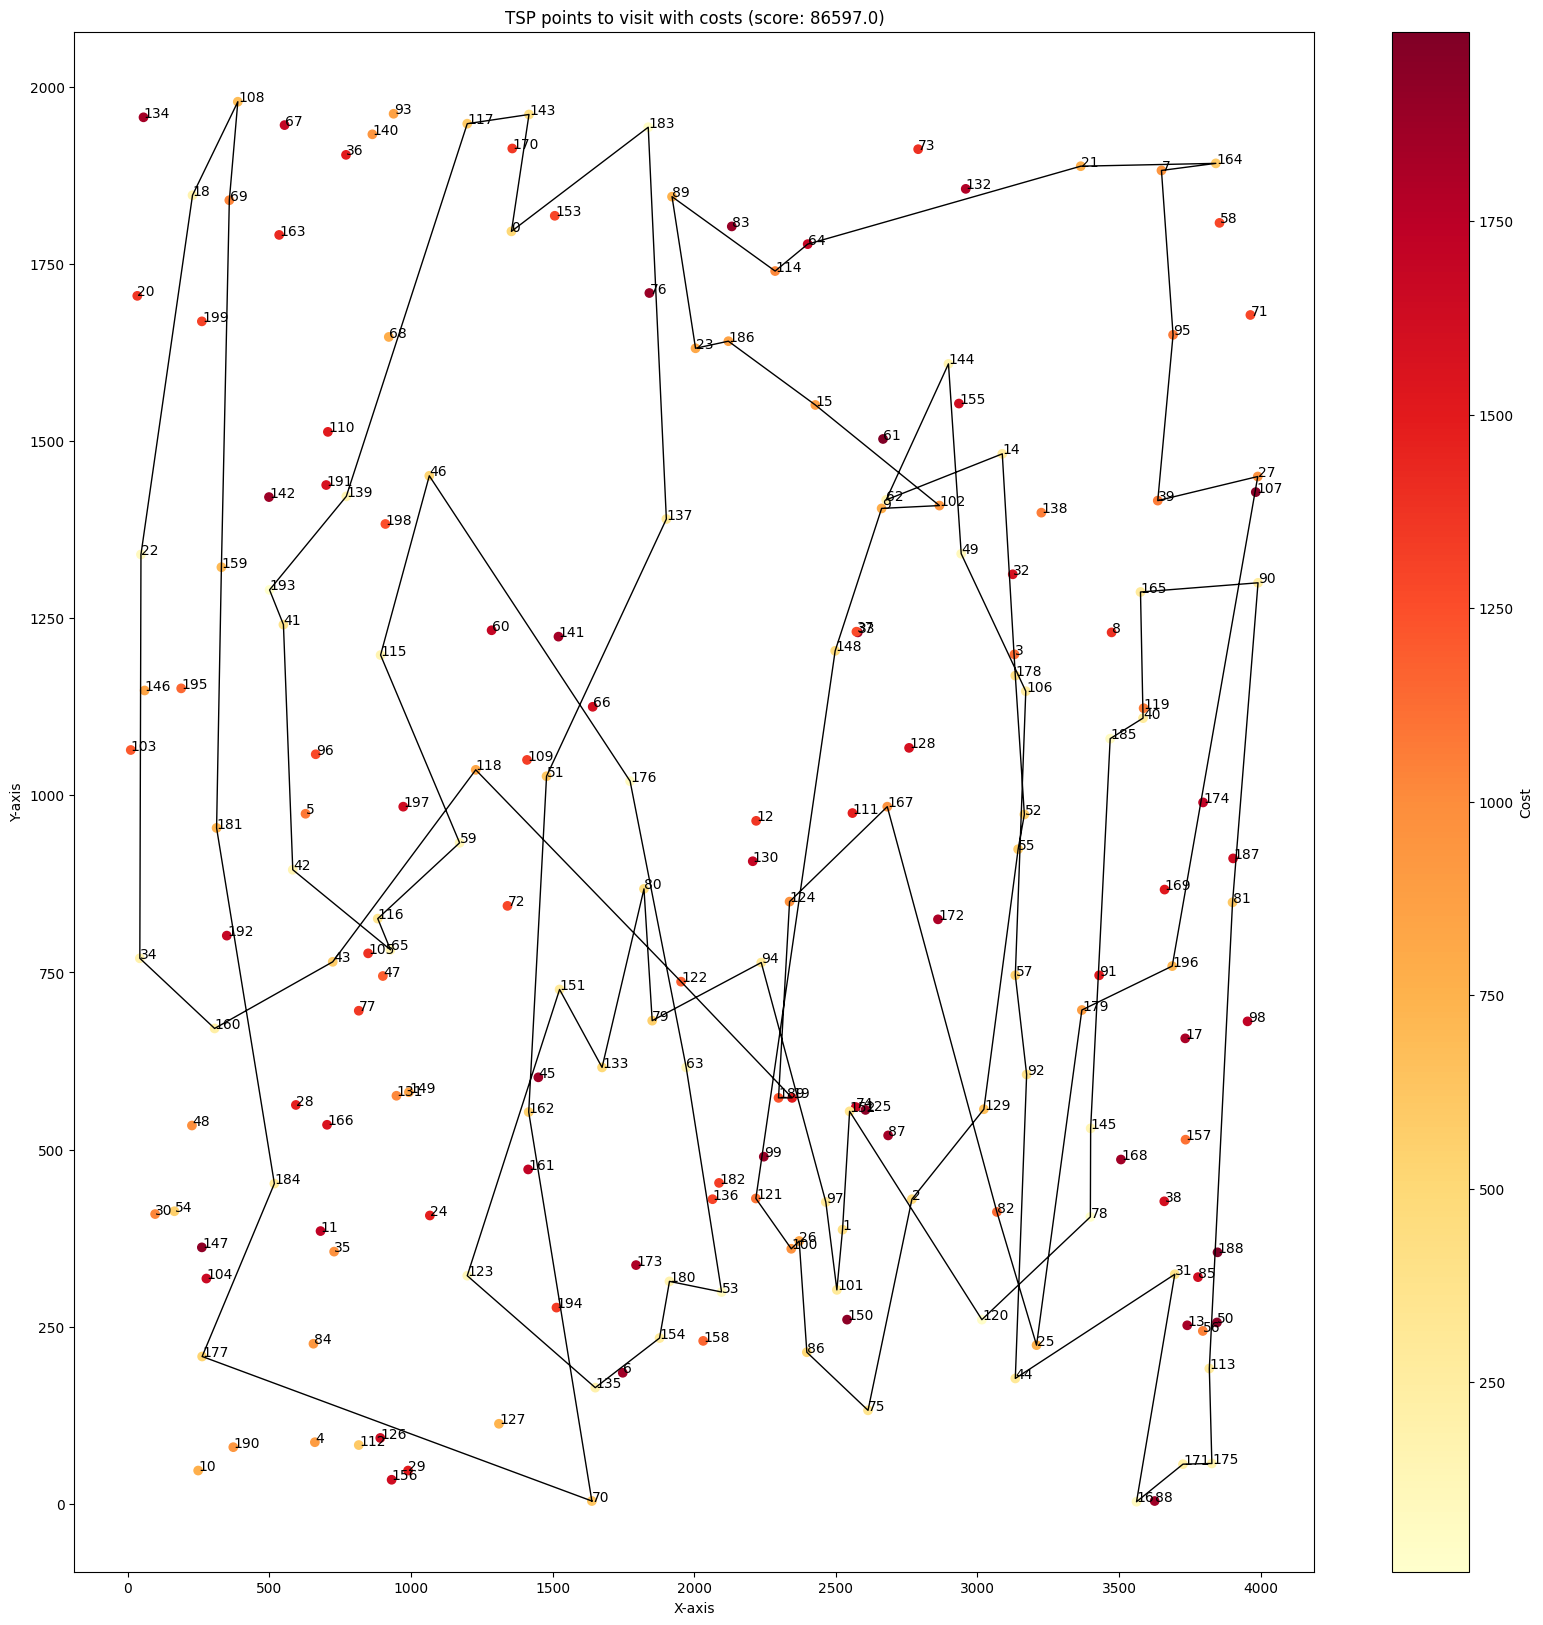

In [15]:
t.visualize(S)

In [16]:
S = _solve_head(D, 0, 100)
S

array([  0, 183, 143, 117, 139, 193,  41,  42,  65, 116,  59, 115,  46,
       176,  63,  53, 180, 154, 135, 123, 151, 133,  80,  79,  94,  97,
       101,   1, 152, 120,  78, 145, 185,  40, 165,  90,  81, 113, 175,
       171,  16,  31,  44,  92,  57, 106,  49, 144,  62,  14, 178,  52,
        55, 129,   2,  75,  86,  26, 100, 121, 148, 137,  23, 186,  89,
       114,  15,   9, 102, 138,  21, 164,   7,  95,  39,  27, 196, 179,
        25,  82, 167, 124,  51, 162, 127,  70, 112, 184, 160,  34,  22,
        18, 108,  69, 159, 181,  43, 149, 131,  35])

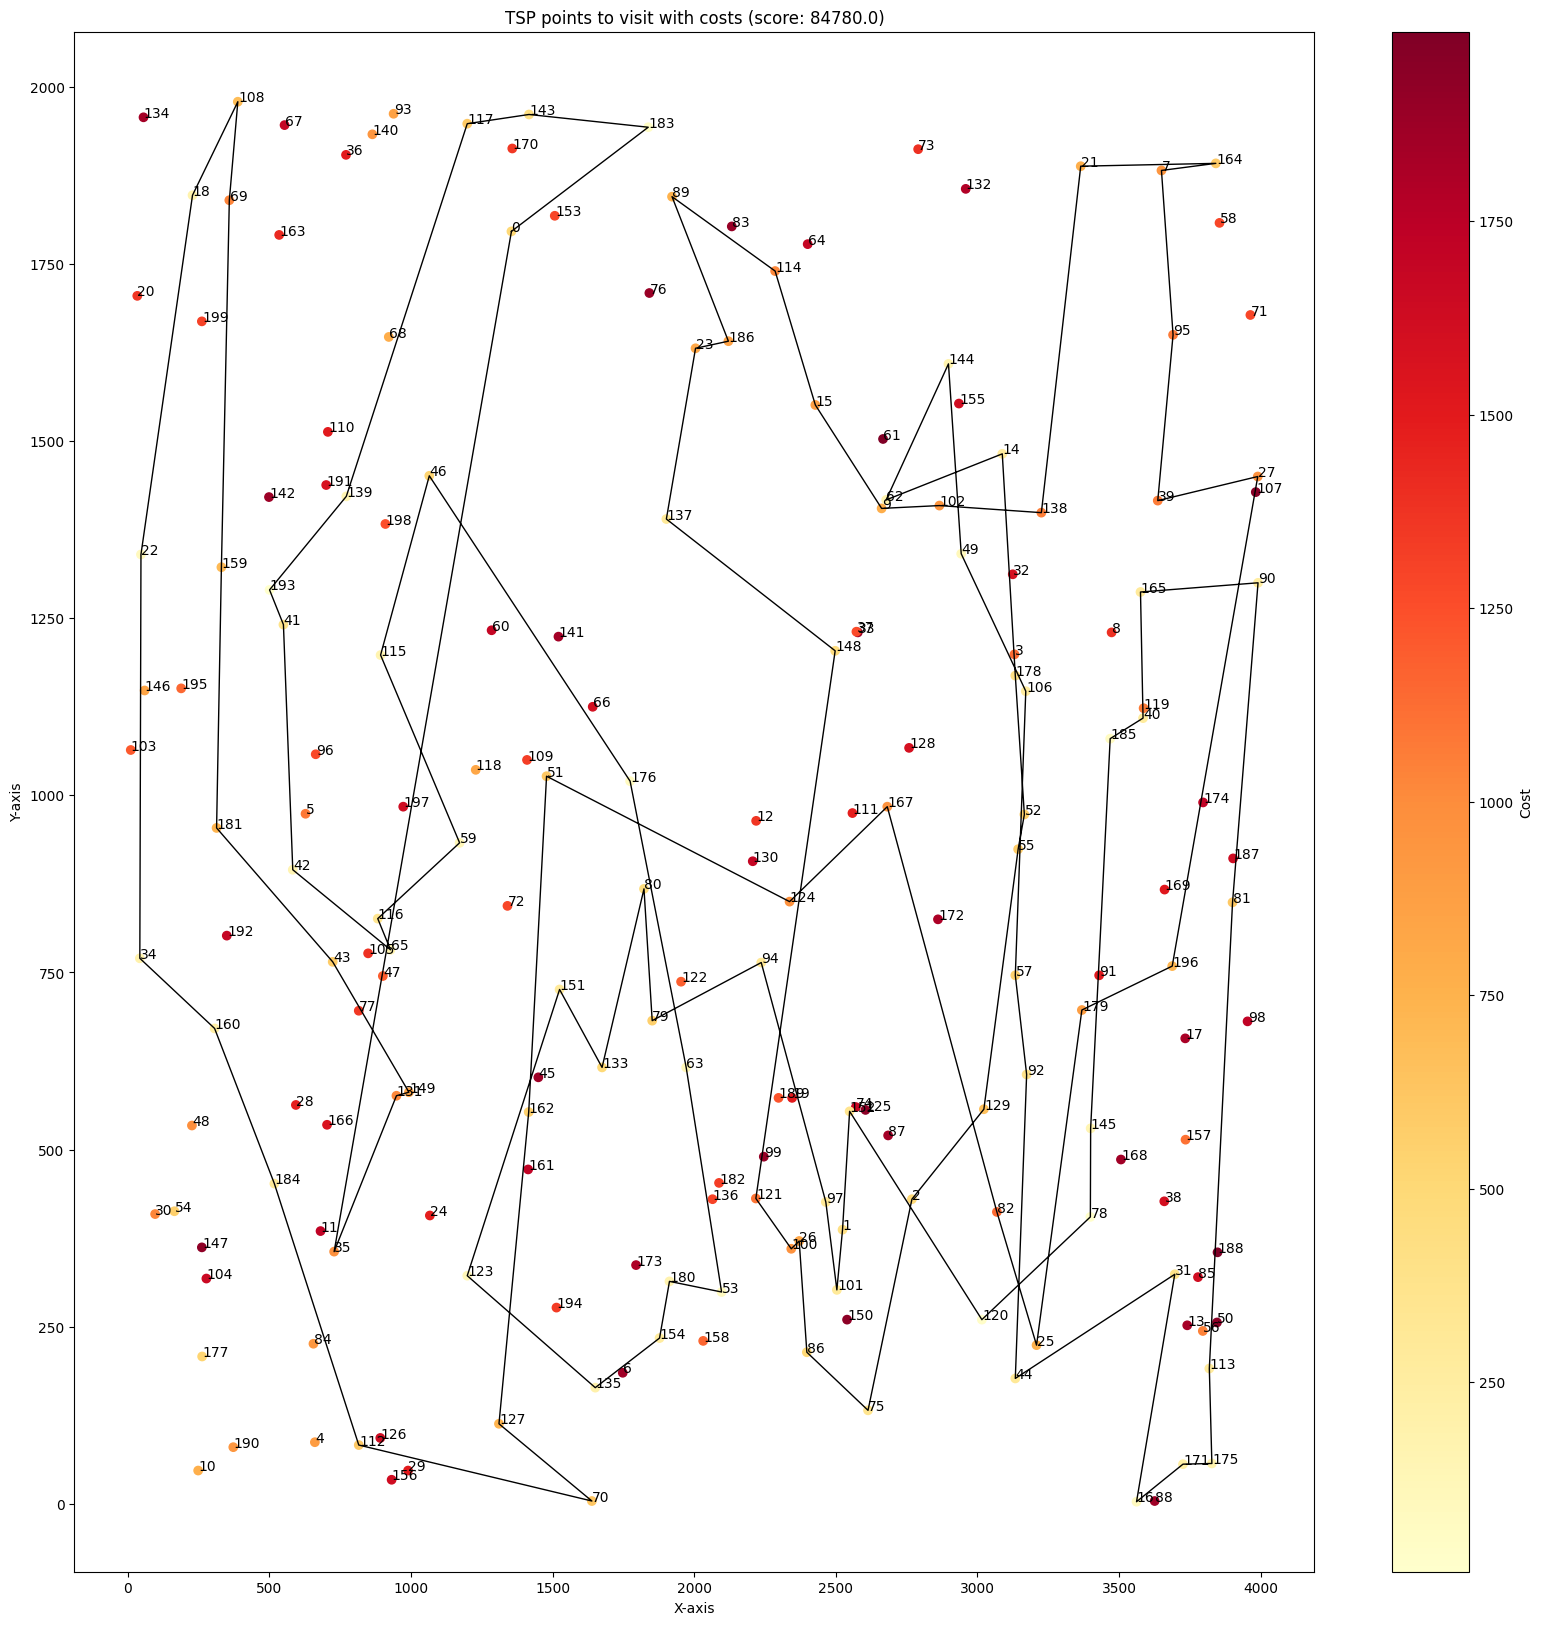

In [17]:
t.visualize(S)

In [13]:
from tsp import TSP
t = TSP.from_csv("../data/TSPA.csv")

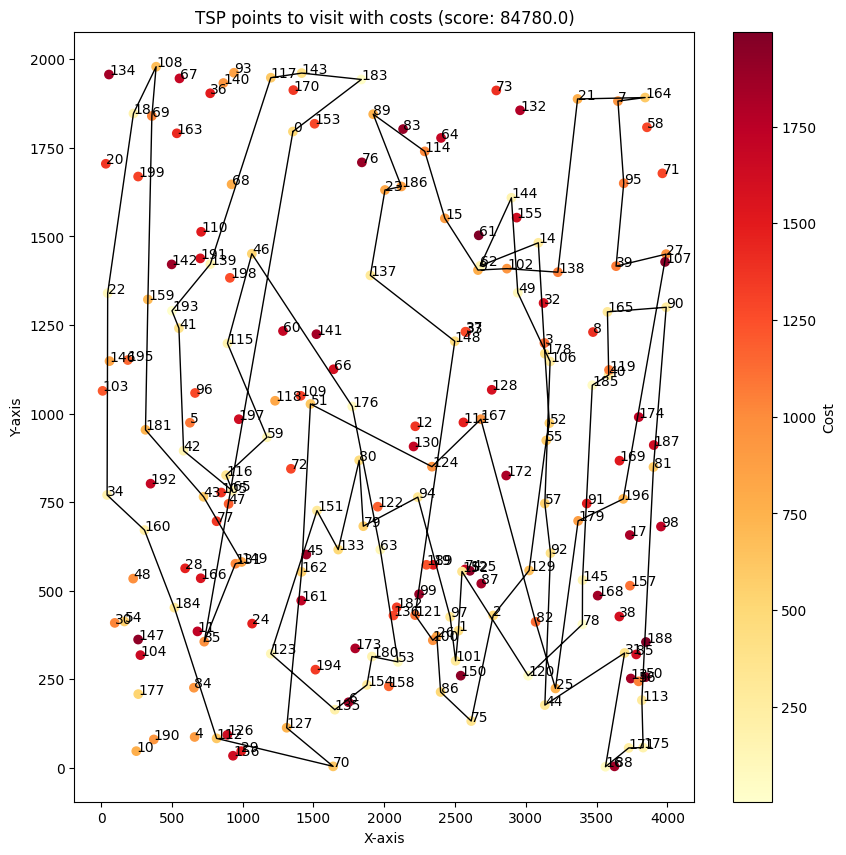

In [30]:
t.visualize(S)

In [31]:
solution = np.array(S)

In [32]:
closed_path = np.concatenate((solution, [solution[0]]))
closed_path

array([  0, 183, 143, 117, 139, 193,  41,  42,  65, 116,  59, 115,  46,
       176,  63,  53, 180, 154, 135, 123, 151, 133,  80,  79,  94,  97,
       101,   1, 152, 120,  78, 145, 185,  40, 165,  90,  81, 113, 175,
       171,  16,  31,  44,  92,  57, 106,  49, 144,  62,  14, 178,  52,
        55, 129,   2,  75,  86,  26, 100, 121, 148, 137,  23, 186,  89,
       114,  15,   9, 102, 138,  21, 164,   7,  95,  39,  27, 196, 179,
        25,  82, 167, 124,  51, 162, 127,  70, 112, 184, 160,  34,  22,
        18, 108,  69, 159, 181,  43, 149, 131,  35,   0])

In [33]:
index_pairs = np.vstack((closed_path[:-1], closed_path[1:])).T

In [34]:
score = np.sum(D[index_pairs[:, 1], index_pairs[:, 0]])
score

84780.0